In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("3-customersatisfaction.csv")

In [5]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [6]:
df.describe()

,Unnamed: 0,Customer Satisfaction,Incentive
count,100.000000,100.000000,100.000000
mean,49.500000,-0.005427,3.445220
std,29.011492,1.721792,2.911818
min,0.000000,-2.992863,-1.068081
25%,24.750000,-1.431357,1.471341
50%,49.500000,0.109167,2.748839
75%,74.250000,1.421119,4.739113
max,99.000000,2.986736,11.000056


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Text(0, 0.5, 'Incentive')

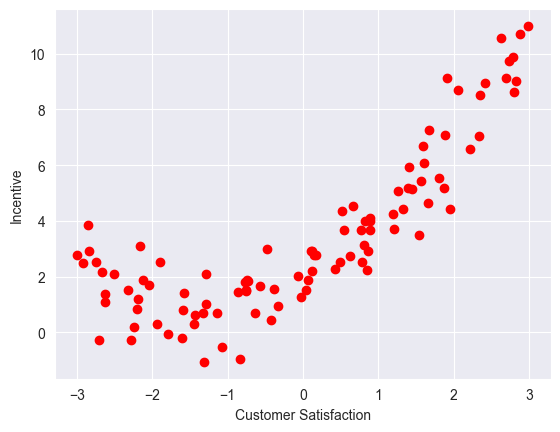

In [9]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"],color="red")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")

In [10]:
#dependent - independent features
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [11]:
#train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [12]:
regression = LinearRegression()

In [13]:
#scaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
#prediction

In [17]:
y_pred = regression.predict(X_test)

In [18]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [19]:
score = r2_score(y_test, y_pred)
print(score)

0.2705652535622246


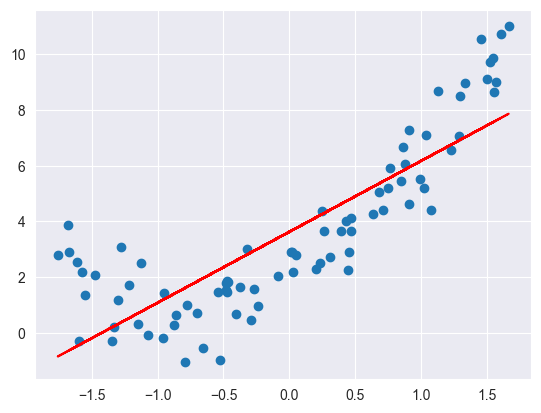

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train),color="red")

In [21]:
poly2 = PolynomialFeatures(degree=2)

In [22]:
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.transform(X_test)

In [23]:
X

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333
...,...
95,2.055072
96,0.864149
97,-1.586101
98,1.558528


In [24]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
from sklearn.metrics import r2_score  # yeniden import

y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7685687698788557


In [26]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [27]:
regression.intercept_

np.float64(2.076676429793282)

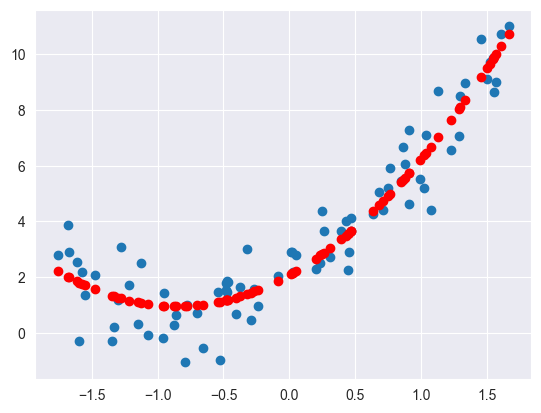

In [28]:
plt.scatter(X_train, y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="red")
plt.show()

In [29]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [30]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
from sklearn.metrics import r2_score  # yeniden import

y_pred = regression.predict(X_test_poly)
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.7573443621401048


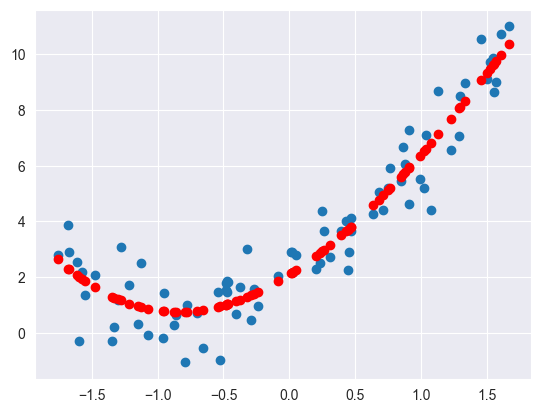

In [32]:
plt.scatter(X_train, y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="red")
plt.show()

In [43]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


degree yi 2 tutmak daha iyi oldu.

yeni gelen data ile çalışmak

In [33]:
new_df = pd.read_csv("3-newdatas.csv")

In [34]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [35]:
new_df.rename(columns={"0": "Customer Satisfaction",},inplace=True)


In [36]:
X_new = scaler.fit_transform(new_df)

In [37]:
X_new_poly = poly.transform(X_new)

In [38]:
y_new = regression.predict(X_new_poly)

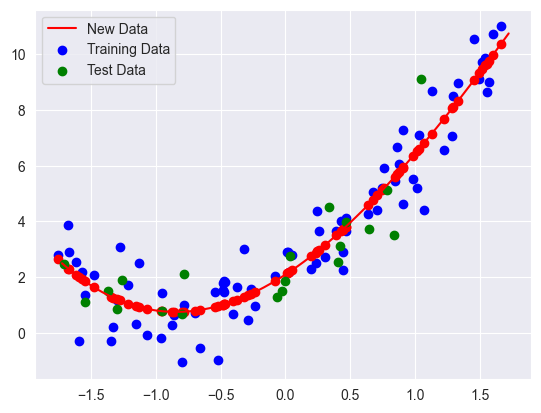

In [39]:
plt.plot(X_new,y_new,color="red",label="New Data")
plt.scatter(X_train,y_train,color="b",label="Training Data")
plt.scatter(X_train,regression.predict(X_train_poly),color="red")
plt.scatter(X_test,y_test,color="g",label="Test Data")
plt.legend()
plt.show()

PİPELİNE

In [40]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline(
        [
            ("standard_scaler", scaler),
            ("poly_features", poly_features),
            ("lin_reg", lin_reg),
        ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(degree,".","R2 score = ",score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new,y_pred_new,color="red",label="New Data")
    plt.scatter(X_train,y_train,color="b",label="Training Data")
    plt.scatter(X_train,regression.predict(X_train_poly),color="red")
    plt.scatter(X_test,y_test,color="g",label="Test Data")
    plt.legend()
    plt.show()

2 . R2 score =  0.7685687698788558


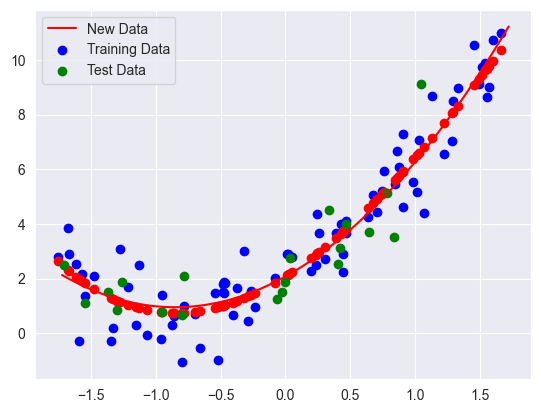

In [41]:
poly_regression(2)

1 . R2 score =  0.2705652535622246


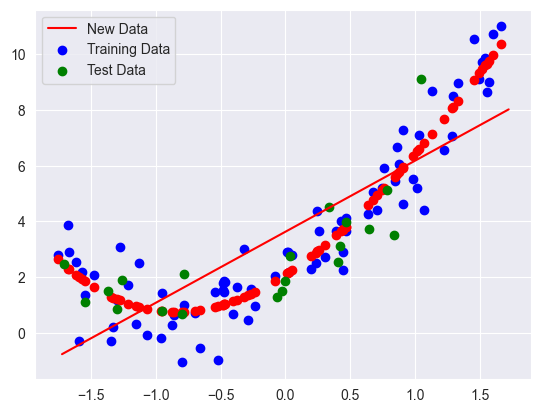

2 . R2 score =  0.7685687698788558


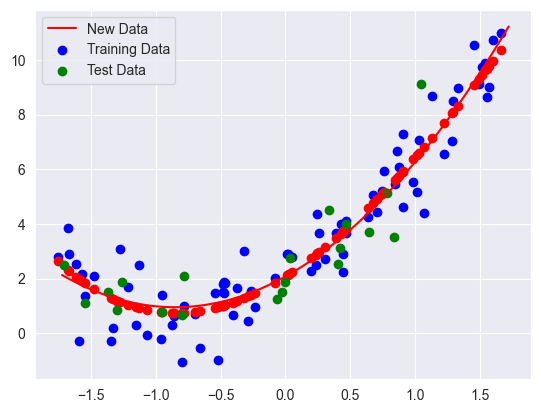

3 . R2 score =  0.757344362140105


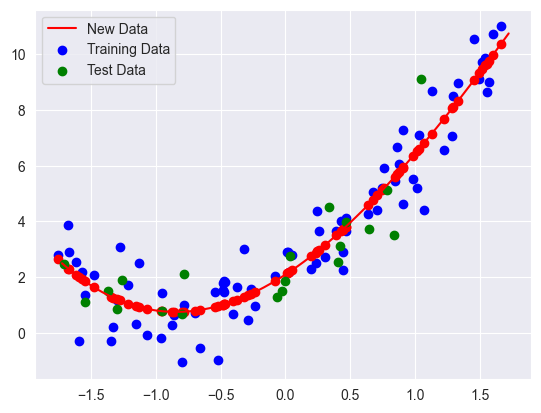

4 . R2 score =  0.7355034443260414


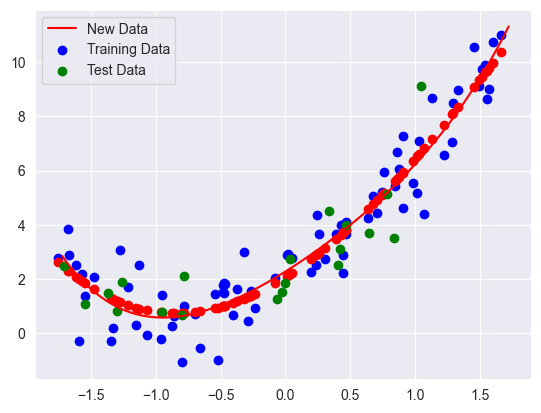

5 . R2 score =  0.7351244165095401


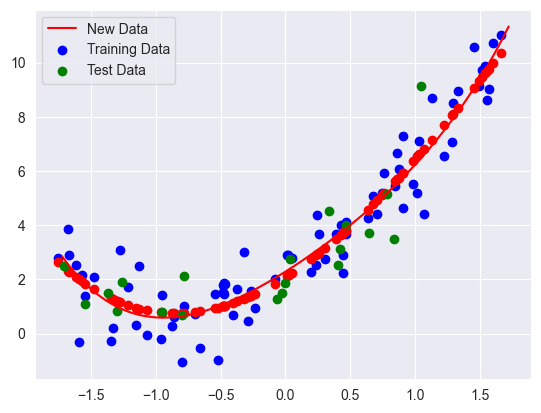

6 . R2 score =  0.7343590482133427


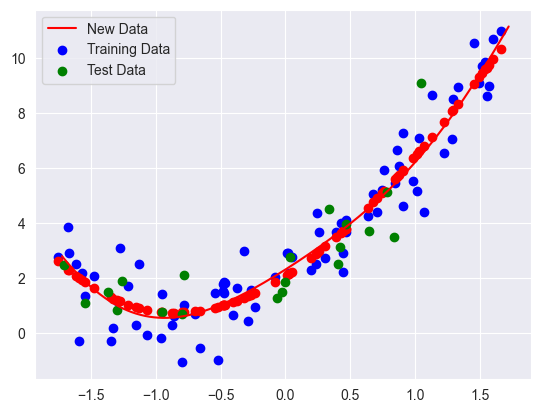

7 . R2 score =  0.7347819263549451


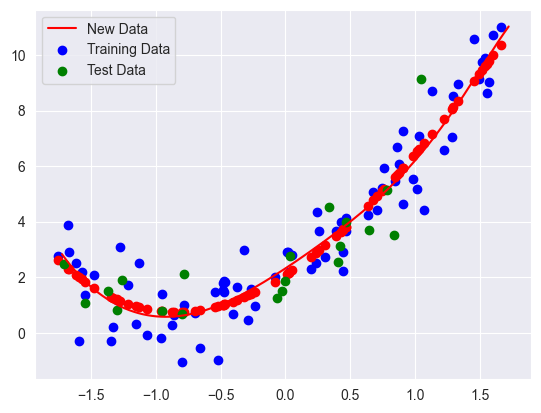

In [42]:
for degree in[1,2,3,4,5,6,7]:
    poly_regression(degree)
